<h4>introduction</h4>
<ol>
<li>link to the data set: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset</li>
<li>here the basic aim is to</li>
    <ol>
        <li>make a model to predict a new costomer with these features will default payment next month or not.</li>
        <li>how exactly different demographic variables affects the probability of default payment?</li>
        <li>which variables are strongest predictors of default payment?</li>
    </ol>
</ol>


#### import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from termcolor import colored 

#### pre-configurations

In [2]:
pd.set_option('display.max_columns', None) # for diplaying all columns
%config InlineBackend.figure_formats = ['svg'] # for clear inline plots
warnings.filterwarnings('ignore') # stop displaying warnings

# for printing colored text as headings
def cm(txt):
    formatted_txt = colored('{}'.format(txt), 'green', attrs=['bold', 'underline'])
    print(formatted_txt)

#### load data frame to python environment

In [3]:
df = pd.read_csv('data.csv')
display(df[0:5])

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

### exploratory data analysis for understanding the data

#### checking the summary of data

In [4]:
cm('information of the data')
df.info() # displays sutomatically

cm('description of the data')
description = df.describe()
display(description)

information of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AM

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

#### checking distribution of each columns

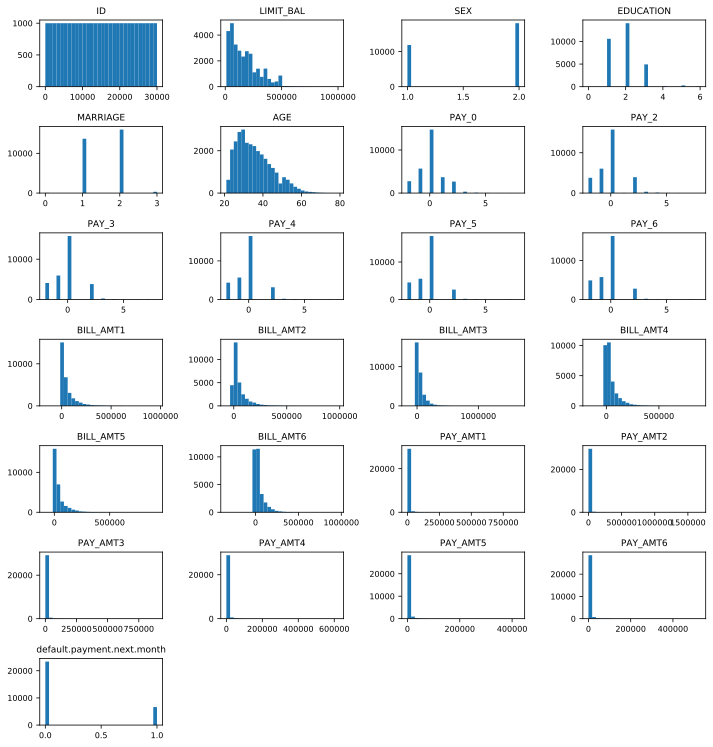

In [5]:
plt.figure(figsize=(10, 10.5))

for i in range(0, len(df.columns)):
    plt.subplot(7, 4, i+1)
    plt.hist(df[df.columns[i]], bins=30)
    plt.title(df.columns[i], fontsize=9)
    plt.xticks(fontsize=8); plt.yticks(fontsize=8)
    
plt.tight_layout()
plt.show()

#### assigning proper intuative names to the columns

In [6]:
# renaming 'PAY_0' to 'PAY_1'
df = df.rename(columns={'PAY_0':'PAY_1', 'default.payment.next.month':'default_payment_nextmonth'})  

### split the data to train test split

In [7]:
X = df.iloc[:, 0:24]
y = df.iloc[:, 24:25]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

X_train = X_train.reset_index(drop=True); y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True); y_test = y_test.reset_index(drop=True)

22500 22500 7500 7500


### pre-processing

1. removing or imputing outliers from continious features(outlier dealing).
2. removing or imputing nan values from both continious and categorical features(nan dealing).
3. proper ecoding the weighted, non-weighted categorical features(vectorization).
4. creating new derived features(feature transformation).
5. feature scaling(min_max scaling/standardization)

In [8]:
display(X_train.head())
print('columns:', len(X_train.columns))
print('rows:', len(X_train.index))

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0  27351   200000.0    1          1         2   32     -1     -1     -1   
1  22030   320000.0    2          1         2   28      0      0      0   
2  22167   170000.0    2          1         2   27     -1     -1      2   
3   1881    90000.0    2          3         1   40      0      0      0   
4   1320   250000.0    2          1         1   43     -1     -1     -1   

   PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     -2     1125.0     2182.0        0.0        0.0        0.0   
1      0      0      0   293073.0   293210.0   290057.0    25922.0    22982.0   
2     -1     -1     -1      356.0     1472.0      736.0      736.0      736.0   
3      0      0      0    89928.0    81721.0    76947.0    46589.0    47730.0   
4      0      0     -1    17454.0      -50.0    45297.0    17371.0    11481.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0        0.0    2182.0       0.0       0.0       0.0       0.0       0.0  
1    20553.0   13300.0   12756.0    1295.0   10312.0    8394.0    8242.0  
2      736.0    1536.0       0.0     736.0     736.0     736.0     736.0  
3    49488.0    3416.0    4142.0    1700.0    1888.0    2710.0    1500.0  
4     5922.0   24890.0   48394.0       0.0    5461.0   15000.0    6000.0

columns: 24
rows: 22500


#### outlier dealing

In [9]:
continious_features = X_train[[
    'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' 
]]

plt.figure(figsize=(10, 7.5))

for i in range(0, len(continious_features.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(continious_features[continious_features.columns[i]])
    plt.title(continious_features.columns[i], fontsize=9)
    plt.xlabel(''); plt.xticks(fontsize=8); plt.yticks(fontsize=8)
    plt.grid()
    
plt.tight_layout()
plt.show()

* skipping this part, should know more regarding causes for removing outliers for any machinelearning model(regression, classification, segmentation) so as to take a decision whether to remove the outliers in this case or not.

#### nan dealing

In [10]:
# *in 'EDUCATION' column 0, 4, 5, 6 are unknown(can be traeted as nan). so let's assign every unknown to the mode i.e 2
education = X_train[['EDUCATION']]
education = education.replace([0, 4, 5, 6], [2, 2, 2, 2])
# display(education.describe())
X_train = pd.concat([X_train.iloc[:, 0:3], education, X_train.iloc[:, 4:]], axis=1)
# display(X_train[['EDUCATION']].describe())

# *in 'MARRIAGE' column 0 is unknown, so let's assign every 0, 3 to the mode i.e 2 
marriage = X_train[['MARRIAGE']]
marriage = marriage.replace([0, 3], [2, 2])
X_train = pd.concat([X_train.iloc[:, 0:4], marriage, X_train.iloc[:, 5:]], axis=1)
# display(X_train[['MARRIAGE']].describe())

# -------------------------------------------------------
# *in 'PAY_0' to 'PAY_6' the value -2 has no description. but it appears a lot of time, so can't be removed or replced.
# lets assume this as more better than -1, i.e client has either didn't take any money and if taken, even the due time 
# had not come to make the the conclusion that the amount is paid duely or not.
# -------------------------------------------------------

the nan values(unknown values) of columns 'EDUCATION', 'MARRIAGE', 'PAY_0 to PAY_6' are dealt.

#### vectorization

In [11]:
# *encoding of sex column. it's a non weighted category. so apply one-hot encoding
sex = X_train[['SEX']]
unq = sex['SEX'].unique()
# display(unq)
sex_dm1 = sex.replace([1, 2], [1, 0]); sex_dm1 = sex_dm1.rename(columns={'SEX':'sex_dm1'})  
sex_dm2 = sex.replace([1, 2], [0, 1]); sex_dm2 = sex_dm2.rename(columns={'SEX':'sex_dm2'})  
X_train = pd.concat([X_train, sex_dm1, sex_dm2], axis=1)

# *rencoding education column, start from 0
education = X_train[['EDUCATION']]
# print(education['EDUCATION']. unique())
education = education.replace([1, 2, 3], [0, 1, 2])
X_train = pd.concat([X_train.iloc[:, 0:3], education, X_train.iloc[:, 4:]], axis=1)

# *rencoding education column. it's a not weighted category. so apply one-hot encoding
marriage = X_train[['MARRIAGE']]
# print(marriage['MARRIAGE'].unique())
marriage_dm1 = marriage.replace([1, 2], [1, 0]); marriage_dm1 = marriage_dm1.rename(columns={'MARRIAGE':'marriage_dm1'})  
marriage_dm2 = marriage.replace([1, 2], [0, 1]); marriage_dm2 = marriage_dm2.rename(columns={'MARRIAGE':'marriage_dm2'})  
X_train = pd.concat([X_train, marriage_dm1, marriage_dm2], axis=1)

#### feature transformation

In [12]:
# *derived feature 1, sum of all delays
all_delays = X_train.iloc[:, 6:12]
all_delays_sum = all_delays.sum(axis=1)
list_of_tuples = list(zip(all_delays_sum))
all_delays_sum = pd.DataFrame(list_of_tuples, columns=['all_delays_sum'])
# display(all_delays_sum)
X_train = pd.concat([X_train, all_delays_sum], axis=1)

# *derived feature 2,sum of all bills
all_bills = X_train.iloc[:, 12:18]
all_bills_sum = all_bills.sum(axis=1)
list_of_tuples = list(zip(all_bills_sum))
all_bills_sum = pd.DataFrame(list_of_tuples, columns=['all_bills_sum'])
X_train = pd.concat([X_train, all_bills_sum], axis=1)

# *derived feature 3,sum of all payments
all_payments = X_train.iloc[:, 18:24]
all_payments_sum = all_payments.sum(axis=1)
list_of_tuples = list(zip(all_payments_sum))
all_payments_sum = pd.DataFrame(list_of_tuples, columns=['all_payments_sum'])
X_train = pd.concat([X_train, all_payments_sum], axis=1)

# *derived feature 4, ratio of sum of credit bills vs sum of all payments
bill_payment_ratio = all_bills_sum['all_bills_sum']/all_payments_sum['all_payments_sum']
list_of_tuples = list(zip(bill_payment_ratio))
bill_payment_ratio = pd.DataFrame(list_of_tuples, columns=['bill_payment_ratio'])

description = bill_payment_ratio.describe(); display(description)
display(bill_payment_ratio.median())

# bill_payment_ratio = bill_payment_ratio.replace([-np.inf, np.inf], [np.nan, np.nan])
# min and max value got from df.describe()
bill_payment_ratio = bill_payment_ratio.replace([-np.inf, np.inf, np.nan], [-3914.666667, 62043.133333, 10.054345]) 

X_train = pd.concat([X_train, bill_payment_ratio], axis=1)

bill_payment_ratio
count        2.191000e+04
mean                  NaN
std                   NaN
min                  -inf
25%          1.532571e+00
50%          1.005434e+01
75%          2.328653e+01
max                   inf

bill_payment_ratio    10.054345
dtype: float64

#### exploratory data analysis for new transformed features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   all_delays_sum      22500 non-null  int64  
 1   all_bills_sum       22500 non-null  float64
 2   all_payments_sum    22500 non-null  float64
 3   bill_payment_ratio  22500 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 703.2 KB


all_delays_sum  all_bills_sum  all_payments_sum  bill_payment_ratio
count    22500.000000   2.250000e+04      2.250000e+04        22500.000000
mean        -1.109822   2.691010e+05      3.168227e+04         1153.192711
std          5.858312   3.790642e+05      5.962165e+04         8369.785511
min        -12.000000  -3.362590e+05      0.000000e+00        -3914.666667
25%         -5.000000   2.916625e+04      6.700000e+03            1.603332
50%          0.000000   1.258925e+05      1.450000e+04           10.054345
75%          0.000000   3.410435e+05      3.400000e+04           23.049035
max         36.000000   5.263883e+06      3.764066e+06        62043.133333

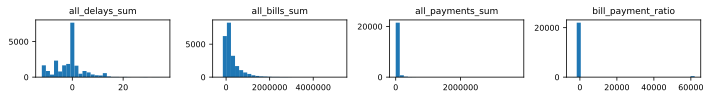

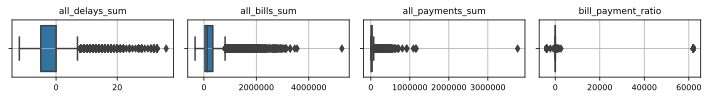

In [13]:
new_features = X_train.iloc[:, 28:]
new_features.info()

description = new_features.describe()
display(description)

plt.figure(figsize=(10, 1.5))
for i in range(0, len(new_features.columns)):
    plt.subplot(1, 4, i+1)
    plt.hist(new_features[new_features.columns[i]], bins=30)
    plt.title(new_features.columns[i], fontsize=9)
    plt.xticks(fontsize=8); plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 1.5))
for i in range(0, len(new_features.columns)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(new_features[new_features.columns[i]])
    plt.title(new_features.columns[i], fontsize=9)
    plt.xlabel(''); plt.xticks(fontsize=8); plt.yticks(fontsize=8)
    plt.grid()
plt.tight_layout()
plt.show()

In [14]:
# X_train.to_csv('X_train.csv', index=False)

#### feature scaling

In [15]:
# standardizing all the features
X_train = pd.read_csv('X_train.csv')

columns_as_str = X_train.columns

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
print(model)
fit = model.fit(X_train)
transformation = model.transform(X_train)
# display(transformation)

X_train = pd.DataFrame(transformation, columns=[X_train.columns])
display(X_train.head())
print('columns:', len(X_train.columns), 'index:', len(X_train.index))

StandardScaler(copy=True, with_mean=True, with_std=True)


ID LIMIT_BAL       SEX EDUCATION  MARRIAGE       AGE     PAY_1  \
0  1.432560  0.251513 -1.235585 -1.170450  0.912440 -0.371533 -0.876321   
1  0.816931  1.178317  0.809333 -1.170450  0.912440 -0.807422  0.014853   
2  0.832781  0.019812  0.809333 -1.170450  0.912440 -0.916395 -0.876321   
3 -1.514270 -0.598057  0.809333  1.718757 -1.095963  0.500246  0.014853   
4 -1.579177  0.637681  0.809333 -1.170450 -1.095963  0.827163 -0.876321   

      PAY_2     PAY_3     PAY_4     PAY_5     PAY_6 BILL_AMT1 BILL_AMT2  \
0 -0.721793 -0.698045 -1.533896 -1.540046 -1.493467 -0.680204 -0.659832   
1  0.113014  0.140459  0.192169  0.243561  0.257875  3.295869  3.441456   
2 -0.721793  1.817466 -0.670864 -0.648242 -0.617796 -0.690677 -0.669838   
3  0.113014  0.140459  0.192169  0.243561  0.257875  0.529214  0.461065   
4 -0.721793 -0.698045  0.192169  0.243561 -0.617796 -0.457817 -0.691286   

  BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0 -0.683559 -0.672524 -0.660784 -0.650122 -0.212932 -0.289115 -0.294472   
1  3.548249 -0.269014 -0.283374 -0.305148  0.466079  0.334530 -0.222035   
2 -0.672821 -0.661067 -0.648697 -0.637769 -0.252385 -0.289115 -0.253303   
3  0.439065  0.052696  0.123036  0.180514 -0.137568 -0.086612 -0.199380   
4 -0.022695 -0.402121 -0.472243 -0.550724  1.173916  2.076882 -0.294472   

   PAY_AMT4  PAY_AMT5  PAY_AMT6   sex_dm1   sex_dm2 marriage_dm1 marriage_dm2  \
0 -0.317762 -0.316895 -0.296845  1.235585 -1.235585    -0.912440     0.912440   
1  0.360326  0.239390  0.171699 -0.809333  0.809333    -0.912440     0.912440   
2 -0.269365 -0.268119 -0.255004 -0.809333  0.809333    -0.912440     0.912440   
3 -0.193612 -0.137298 -0.211572 -0.809333  0.809333     1.095963    -1.095963   
4  0.041338  0.677181  0.044245 -0.809333  0.809333     1.095963    -1.095963   

  all_delays_sum all_bills_sum all_payments_sum bill_payment_ratio  
0      -1.346865     -0.701200        -0.494802          -0.137602  
1       0.189448      1.785215         0.379346          -0.135702  
2      -0.322656     -0.697335        -0.456258          -0.137656  
3       0.189448      0.325287        -0.273837          -0.134730  
4      -0.493357     -0.452772         1.141603          -0.137667

columns: 32 index: 22500


### feature selection

#### tree based method

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

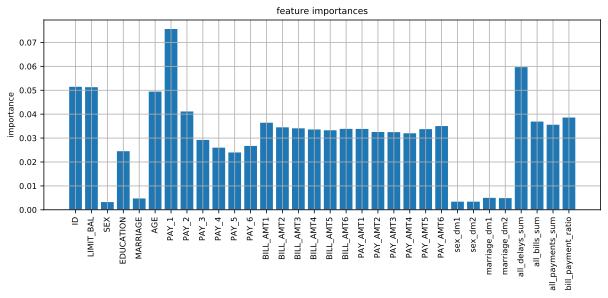

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
display(model)

fit = model.fit(X_train, y_train)

importance = model.feature_importances_

plt.figure(figsize=(10, 3.5))
plt.bar(columns_as_str, importance)
plt.title('feature importances', fontsize=9)
plt.xticks(rotation=90, fontsize=8); plt.ylabel('importance', fontsize=8); plt.yticks(fontsize=8)
plt.grid()
plt.show()

from the above graph it seems features can't be selected this way. All seems irrelevant. But still have to make the 
best model as possible.

### C. which variables are strongest predictors of default payment?

### answer

Look at the above graph. Don't consider the 'ID' as its just an indexing not a feature.

The more the importance of a feature is the more the feature is a strong predictor of default payment.

From the above graph 'PAY_1', 'all_delays_sum','LIMIT_BAL','AGE', 'PAY_2' are the strongest predictor of defaulting payment in next month.

### B. how exactly different demographic variables affects the probability of default payment?

### answer

demograpic features are 'AGE', 'EDUCATION', 'MARRIAGE', 'SEX'.

#### how 'AGE' affects the probability of default payment

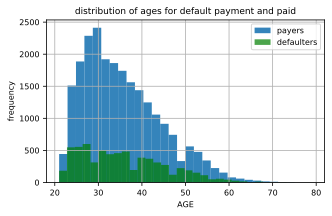

In [17]:
age = df[['AGE']] 

ind = df[df['default_payment_nextmonth'] == 0].index
age_0 = age.iloc[ind]['AGE']

ind = df[df['default_payment_nextmonth'] == 1].index
age_1 = age.iloc[ind]['AGE']

plt.figure(figsize=(5, 3))
plt.hist(age_0, bins=30, alpha = 0.9, label='payers')
plt.hist(age_1, bins=30, alpha = 0.7, label='defaulters', color='green')
plt.title('distribution of ages for default payment and paid', fontsize=9)
plt.xticks(fontsize=8); plt.yticks(fontsize=8)
plt.xlabel('AGE', fontsize=8); plt.ylabel('frequency', fontsize=8)
plt.legend(prop={'size': 8})
plt.grid()
plt.show()

#### how 'EDUCATION' affects the probability of default payment

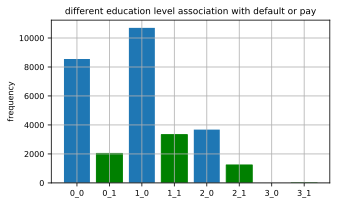

explanation for graph
in the xticks a_b, a=education level(0, 1, 2, 3), 0=graduate school, 1=university, 2=high school, 4=others
b=payer or defaulter(0, 1), 0=payer, 1=defaulter


In [18]:
education = df['EDUCATION']
# print(education.unique())

ind = df[(df['EDUCATION']==1) & (df['default_payment_nextmonth']==0)].index
education_1_0 = education.iloc[ind].count()
ind = df[(df['EDUCATION']==1) & (df['default_payment_nextmonth']==1)].index
education_1_1 = education.iloc[ind].count()

ind = df[(df['EDUCATION']==2) & (df['default_payment_nextmonth']==0)].index
education_2_0 = education.iloc[ind].count()
ind = df[(df['EDUCATION']==2) & (df['default_payment_nextmonth']==1)].index
education_2_1 = education.iloc[ind].count()

ind = df[(df['EDUCATION']==3) & (df['default_payment_nextmonth']==0)].index
education_3_0 = education.iloc[ind].count()
ind = df[(df['EDUCATION']==3) & (df['default_payment_nextmonth']==1)].index
education_3_1 = education.iloc[ind].count()

ind = df[(df['EDUCATION']==(4|5|6|0)) & (df['default_payment_nextmonth']==0)].index
education_4_0 = education.iloc[ind].count()
ind = df[(df['EDUCATION']==(4|5|6|0)) & (df['default_payment_nextmonth']==1)].index
education_4_1 = education.iloc[ind].count()

plt.figure(figsize=(5, 3))
bars = plt.bar(['0_0', '0_1', '1_0', '1_1', '2_0', '2_1', '3_0', '3_1'],[education_1_0, education_1_1, education_2_0, 
                                                                         education_2_1, education_3_0, education_3_1,
                                                                         education_4_0, education_4_1])
bars[1].set_color('green'); bars[3].set_color('green'); bars[5].set_color('green'), bars[7].set_color('green')
plt.title('different education level association with default or pay', fontsize=9)
plt.xticks(fontsize=8); plt.yticks(fontsize=8)
plt.ylabel('frequency', fontsize=8)
plt.grid()
plt.show()

cm('explanation for graph')
print('in the xticks a_b, a=education level(0, 1, 2, 3), 0=graduate school, 1=university, 2=high school, 4=others')
print('b=payer or defaulter(0, 1), 0=payer, 1=defaulter')

#### how 'MARRIAGE' affects the probability of default payment

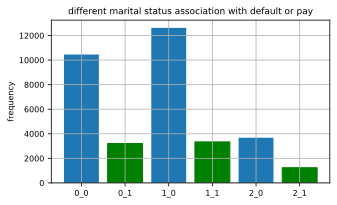

explanation for graph
in the xticks a_b, a=marital status(0, 1, 2), 0=married, 1=single, 2=others
b=payer or defaulter(0, 1), 0=payer, 1=defaulter


In [19]:
education = df['MARRIAGE']
# print(education.unique())

ind = df[(df['MARRIAGE']==1) & (df['default_payment_nextmonth']==0)].index
education_1_0 = education.iloc[ind].count()
ind = df[(df['MARRIAGE']==1) & (df['default_payment_nextmonth']==1)].index
education_1_1 = education.iloc[ind].count()

ind = df[(df['MARRIAGE']==2) & (df['default_payment_nextmonth']==0)].index
education_2_0 = education.iloc[ind].count()
ind = df[(df['MARRIAGE']==2) & (df['default_payment_nextmonth']==1)].index
education_2_1 = education.iloc[ind].count()

ind = df[(df['EDUCATION']==(3|0)) & (df['default_payment_nextmonth']==0)].index
education_3_0 = education.iloc[ind].count()
ind = df[(df['EDUCATION']==(3|0)) & (df['default_payment_nextmonth']==1)].index
education_3_1 = education.iloc[ind].count()

plt.figure(figsize=(5, 3))
bars = plt.bar(['0_0', '0_1', '1_0', '1_1', '2_0', '2_1'],[education_1_0, education_1_1, education_2_0, 
                                                                         education_2_1, education_3_0, education_3_1])
bars[1].set_color('green'); bars[3].set_color('green'); bars[5].set_color('green')
plt.title('different marital status association with default or pay', fontsize=9)
plt.xticks(fontsize=8); plt.yticks(fontsize=8)
plt.ylabel('frequency', fontsize=8)
plt.grid()
plt.show()

cm('explanation for graph')
print('in the xticks a_b, a=marital status(0, 1, 2), 0=married, 1=single, 2=others')
print('b=payer or defaulter(0, 1), 0=payer, 1=defaulter')

#### how 'SEX' affects the probability of default payment

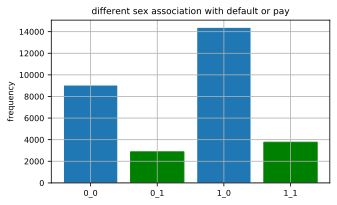

explanation for graph
in the xticks a_b, a=sex(0, 1), 0=male, 1=female
b=payer or defaulter(0, 1), 0=payer, 1=defaulter


In [20]:
education = df['SEX']
# print(education.unique())

ind = df[(df['SEX']==1) & (df['default_payment_nextmonth']==0)].index
education_1_0 = education.iloc[ind].count()
ind = df[(df['SEX']==1) & (df['default_payment_nextmonth']==1)].index
education_1_1 = education.iloc[ind].count()

ind = df[(df['SEX']==2) & (df['default_payment_nextmonth']==0)].index
education_2_0 = education.iloc[ind].count()
ind = df[(df['SEX']==2) & (df['default_payment_nextmonth']==1)].index
education_2_1 = education.iloc[ind].count()

plt.figure(figsize=(5, 3))
bars = plt.bar(['0_0', '0_1', '1_0', '1_1'],[education_1_0, education_1_1, education_2_0, education_2_1])
bars[1].set_color('green'); bars[3].set_color('green')
plt.title('different sex association with default or pay', fontsize=9)
plt.xticks(fontsize=8); plt.yticks(fontsize=8)
plt.ylabel('frequency', fontsize=8)
plt.grid()
plt.show()

cm('explanation for graph')
print('in the xticks a_b, a=sex(0, 1), 0=male, 1=female')
print('b=payer or defaulter(0, 1), 0=payer, 1=defaulter')

###  A. make a model to predict a new costomer with these features will default payment next month or not.

### answer

## applying machine learning

#### appling logistic regression

##### checking multi-colliniarity

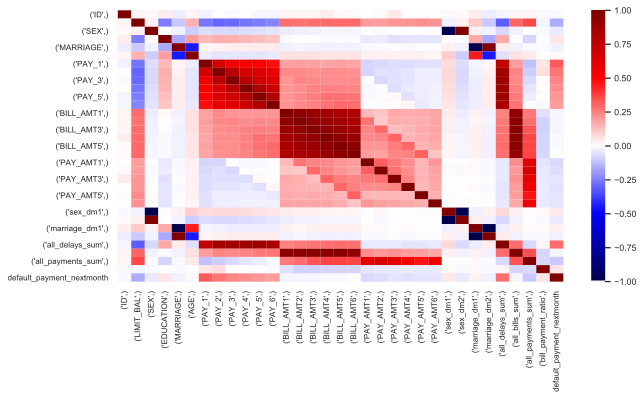

In [21]:
df_whole = pd.concat([X_train, y_train], axis=1)
# display(df_whole)
correlations = df_whole.corr()

plt.figure(figsize=(10, 5))
sns.set(font_scale=0.8)
sns.heatmap(correlations, cmap='seismic')
plt.xticks(fontsize=8); plt.yticks(fontsize=8)
plt.show()

not sure how to check multi-collinearity and select features in this case. needs to be cleared.

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 

from sklearn.metrics import recall_score, make_scorer
evaluator = make_scorer(recall_score, pos_label=1)

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(model, param_grid={}, cv=10, scoring=evaluator)
search.fit(X_train, y_train)
print('max_recall:', search.best_score_)

max_recall: 0.24271492408264855


#### applying decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() 

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(model, param_grid={}, cv=10, scoring=evaluator)
search.fit(X_train, y_train)
print('max_recall:', search.best_score_)

max_recall: 0.40988864916406065


#### applying random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() 

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(model, param_grid={}, cv=10, scoring=evaluator)
search.fit(X_train, y_train)
print('max_recall:', search.best_score_)

max_recall: 0.37713550378576677


#### applying naive bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(model, param_grid={}, cv=10, scoring=evaluator)
search.fit(X_train, y_train)
print('max_recall:', search.best_score_)

max_recall: 0.5993446623516199


#### applying svm

In [26]:
from sklearn.svm import SVC
model = SVC() 

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(model, param_grid={}, cv=10, scoring=evaluator)
search.fit(X_train, y_train)
print('max_recall:', search.best_score_)

max_recall: 0.3423682658198185


#### applying knn

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() 

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(model, param_grid={}, cv=10, scoring=evaluator)
search.fit(X_train, y_train)
print('max_recall:', search.best_score_)

max_recall: 0.3357445880099877


#### applying neural network

In [29]:
from tensorflow import keras 
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Dense(3, input_shape = (32,)),
    keras.layers.Dense(2)
])

model.summary()

adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

model.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(X_train.shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 99        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
(22500, 32)


In [30]:
model.fit(X_train, y_train, epochs=30, batch_size=100)
model.save('credit_card_default_classification.h5')

Train on 22500 samples
Epoch 1/30
22500/22500 [==============================] - 1s 52us/sample - loss: 0.8286 - accuracy: 0.6391
Epoch 2/30
22500/22500 [==============================] - 1s 24us/sample - loss: 0.7297 - accuracy: 0.6340
Epoch 3/30
22500/22500 [==============================] - 0s 22us/sample - loss: 0.7071 - accuracy: 0.6746
Epoch 4/30
22500/22500 [==============================] - 0s 22us/sample - loss: 0.7233 - accuracy: 0.7070
Epoch 5/30
22500/22500 [==============================] - 0s 22us/sample - loss: 0.7167 - accuracy: 0.7516
Epoch 6/30
22500/22500 [==============================] - 0s 22us/sample - loss: 0.7221 - accuracy: 0.7756
Epoch 7/30
22500/22500 [==============================] - 1s 23us/sample - loss: 0.7098 - accuracy: 0.7768
Epoch 8/30
22500/22500 [==============================] - 1s 25us/sample - loss: 0.6957 - accuracy: 0.7802
Epoch 9/30
22500/22500 [==============================] - 1s 27us/sample - loss: 0.7010 - accuracy: 0.7806
Epoch 10/30
22

neural network performs badly in such scenario and of course this kind of algorithms are not made for such cases.

### model selection

as 'naive bayes' has highest recall it is taken for further research.

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 

from sklearn.metrics import make_scorer, recall_score, roc_auc_score, accuracy_score 
eval_1 = make_scorer(recall_score, pos_label=1)
eval_2 = make_scorer(roc_auc_score)
eval_3 = make_scorer(accuracy_score)

evaluator = {'recall':eval_1, 'auc':eval_2, 'accuracy:':eval_3}

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(model, param_grid={}, cv=10, scoring=evaluator, refit=False)
search.fit(X_train, y_train)
display(search.cv_results_)

{'mean_fit_time': array([0.03973236]),
 'std_fit_time': array([0.0055561]),
 'mean_score_time': array([0.01097295]),
 'std_score_time': array([0.00209932]),
 'params': [{}],
 'split0_test_recall': array([0.6626506]),
 'split1_test_recall': array([0.56425703]),
 'split2_test_recall': array([0.58835341]),
 'split3_test_recall': array([0.66666667]),
 'split4_test_recall': array([0.57228916]),
 'split5_test_recall': array([0.57831325]),
 'split6_test_recall': array([0.62449799]),
 'split7_test_recall': array([0.56136821]),
 'split8_test_recall': array([0.56740443]),
 'split9_test_recall': array([0.60764588]),
 'mean_test_recall': array([0.59934466]),
 'std_test_recall': array([0.03772288]),
 'rank_test_recall': array([1]),
 'split0_test_auc': array([0.70832302]),
 'split1_test_auc': array([0.69508514]),
 'split2_test_auc': array([0.6717452]),
 'split3_test_auc': array([0.70633562]),
 'split4_test_auc': array([0.69482038]),
 'split5_test_auc': array([0.69669087]),
 'split6_test_auc': array(

In [32]:
result = search.cv_results_
mean_recall = result['mean_test_recall']
mean_auc = result['mean_test_auc']
mean_accuracy = result['mean_test_accuracy:']

print(mean_recall, mean_auc, mean_accuracy)

[0.59934466] [0.69281208] [0.74493333]


the recall, auc, accuracy of the model is good enough with respect to this data set. this is our final model.

In [40]:
model.fit(X_train, y_train)

from sklearn.externals import joblib 
joblib.dump(model, 'credit_card_default_classification.pkl') 

['credit_card_default_classification.pkl']

### using the model

recall: 0.5611814345991561 accuracy: 0.7406666666666667


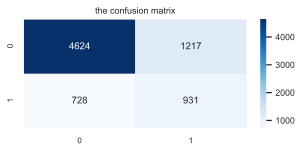

In [48]:
model = joblib.load('credit_card_default_classification.pkl')  
# before making this prediction, X_test was passed through the same pipeline as X_train
predictions = model.predict(X_test)

from sklearn.metrics import recall_score, accuracy_score 
recall = recall_score(y_test, predictions, pos_label=1)
accuracy = accuracy_score(y_test, predictions)
print('recall:', recall, 'accuracy:', accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix_ = confusion_matrix(y_test, predictions)

plt.figure(figsize=(5, 2))
sns.set(font_scale=0.8)
sns.heatmap(confusion_matrix_, cmap='Blues', annot=True, fmt='g')
plt.title('the confusion matrix', fontsize=9)
plt.xticks(fontsize=8); plt.yticks(fontsize=8)
plt.show()

#### making ready the new inputs to model to be passed through the same pipeline

In [38]:
display(X_test.head())
print(len(X_test.columns), len(X_test.index))

ID LIMIT_BAL       SEX EDUCATION  MARRIAGE       AGE     PAY_1  \
0  0.206801 -0.901079 -1.230548  0.267218 -1.087261  0.994643  0.900805   
1 -1.000122 -0.671277  0.812646  0.267218 -1.087261 -0.611992  0.900805   
2 -0.090539 -0.058470 -1.230548  1.700788 -1.087261  0.673316  0.900805   
3  0.069496 -1.130882 -1.230548  0.267218 -1.087261 -0.504883  0.900805   
4  0.389337 -0.288272  0.812646  0.267218  0.919743 -1.040428  0.014883   

      PAY_2     PAY_3     PAY_4     PAY_5     PAY_6 BILL_AMT1 BILL_AMT2  \
0  1.781523  0.134161  0.178919  0.210207  0.239388 -0.030274 -0.018982   
1  1.781523  0.134161  0.178919  0.210207  0.239388  0.420272  0.435801   
2 -0.728922 -0.692633 -1.488027 -0.646149  0.239388 -0.696039 -0.670454   
3  3.455153  2.614542  1.845864  0.210207  0.239388 -0.404123 -0.399019   
4  0.107893  0.134161  1.845864  1.922919  1.943625  1.072691  1.026942   

  BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  0.022940  0.093038 -0.324147 -0.323316 -0.329991 -0.131635 -0.222661   
1  0.472528  0.494308  0.605378  0.662843 -0.329991 -0.089759 -0.143759   
2 -0.668399 -0.679178 -0.662738 -0.653235 -0.238625 -0.201711 -0.304725   
3 -0.377255 -0.366357 -0.335436 -0.356876 -0.329991 -0.201711 -0.304725   
4  1.185636  1.397881  1.548705  1.558612  0.020517  0.225872 -0.012493   

   PAY_AMT4  PAY_AMT5  PAY_AMT6   sex_dm1   sex_dm2 marriage_dm1 marriage_dm2  \
0 -0.242013 -0.261983 -0.245067  1.230548 -1.230548     1.087261    -1.087261   
1 -0.106515 -0.117831 -0.114428 -0.812646  0.812646     1.087261    -1.087261   
2 -0.231935 -0.306518 -0.283593  1.230548 -1.230548     1.087261    -1.087261   
3 -0.224391 -0.243348 -0.229023  1.230548 -1.230548     1.087261    -1.087261   
4  0.017549 -0.306518 -0.008017 -0.812646  0.812646    -0.919743     0.919743   

  all_delays_sum all_bills_sum all_payments_sum bill_payment_ratio  
0       0.675312     -0.091315        -0.404381          -0.136806  
1       0.675312      0.536322        -0.256162          -0.138102  
2      -0.492163     -0.710087        -0.452850          -0.141699  
3       1.842788     -0.396006        -0.444080          -0.137076  
4       1.175659      1.351825         0.032596          -0.139055

32 7500


In [37]:
# *in 'EDUCATION' column 0, 4, 5, 6 are unknown(can be traeted as nan). so let's assign every unknown to the mode i.e 2
education = X_test[['EDUCATION']]
education = education.replace([0, 4, 5, 6], [2, 2, 2, 2])
# display(education.describe())
X_test = pd.concat([X_test.iloc[:, 0:3], education, X_test.iloc[:, 4:]], axis=1)
# display(X_test[['EDUCATION']].describe())

# *in 'MARRIAGE' column 0 is unknown, so let's assign every 0, 3 to the mode i.e 2 
marriage = X_test[['MARRIAGE']]
marriage = marriage.replace([0, 3], [2, 2])
X_test = pd.concat([X_test.iloc[:, 0:4], marriage, X_test.iloc[:, 5:]], axis=1)
# display(X_test[['MARRIAGE']].describe())

# -------------------------------------------------------
# *in 'PAY_0' to 'PAY_6' the value -2 has no description. but it appears a lot of time, so can't be removed or replced.
# lets assume this as more better than -1, i.e client has either didn't take any money and if taken, even the due time 
# had not come to make the the conclusion that the amount is paid duely or not.
# -------------------------------------------------------

#========================================================================================

# *encoding of sex column. it's a non weighted category. so apply one-hot encoding
sex = X_test[['SEX']]
unq = sex['SEX'].unique()
# display(unq)
sex_dm1 = sex.replace([1, 2], [1, 0]); sex_dm1 = sex_dm1.rename(columns={'SEX':'sex_dm1'})  
sex_dm2 = sex.replace([1, 2], [0, 1]); sex_dm2 = sex_dm2.rename(columns={'SEX':'sex_dm2'})  
X_test = pd.concat([X_test, sex_dm1, sex_dm2], axis=1)

# *rencoding education column, start from 0
education = X_test[['EDUCATION']]
# print(education['EDUCATION']. unique())
education = education.replace([1, 2, 3], [0, 1, 2])
X_test = pd.concat([X_test.iloc[:, 0:3], education, X_test.iloc[:, 4:]], axis=1)

# *rencoding education column. it's a not weighted category. so apply one-hot encoding
marriage = X_test[['MARRIAGE']]
# print(marriage['MARRIAGE'].unique())
marriage_dm1 = marriage.replace([1, 2], [1, 0]); marriage_dm1 = marriage_dm1.rename(columns={'MARRIAGE':'marriage_dm1'})  
marriage_dm2 = marriage.replace([1, 2], [0, 1]); marriage_dm2 = marriage_dm2.rename(columns={'MARRIAGE':'marriage_dm2'})  
X_test = pd.concat([X_test, marriage_dm1, marriage_dm2], axis=1)

#========================================================================================

# *derived feature 1, sum of all delays
all_delays = X_test.iloc[:, 6:12]
all_delays_sum = all_delays.sum(axis=1)
list_of_tuples = list(zip(all_delays_sum))
all_delays_sum = pd.DataFrame(list_of_tuples, columns=['all_delays_sum'])
# display(all_delays_sum)
X_test = pd.concat([X_test, all_delays_sum], axis=1)

# *derived feature 2,sum of all bills
all_bills = X_test.iloc[:, 12:18]
all_bills_sum = all_bills.sum(axis=1)
list_of_tuples = list(zip(all_bills_sum))
all_bills_sum = pd.DataFrame(list_of_tuples, columns=['all_bills_sum'])
X_test = pd.concat([X_test, all_bills_sum], axis=1)

# *derived feature 3,sum of all payments
all_payments = X_test.iloc[:, 18:24]
all_payments_sum = all_payments.sum(axis=1)
list_of_tuples = list(zip(all_payments_sum))
all_payments_sum = pd.DataFrame(list_of_tuples, columns=['all_payments_sum'])
X_test = pd.concat([X_test, all_payments_sum], axis=1)

# *derived feature 4, ratio of sum of credit bills vs sum of all payments
bill_payment_ratio = all_bills_sum['all_bills_sum']/all_payments_sum['all_payments_sum']
list_of_tuples = list(zip(bill_payment_ratio))
bill_payment_ratio = pd.DataFrame(list_of_tuples, columns=['bill_payment_ratio'])

description = bill_payment_ratio.describe(); display(description)
display(bill_payment_ratio.median())

# bill_payment_ratio = bill_payment_ratio.replace([-np.inf, np.inf], [np.nan, np.nan])
# min and max value got from df.describe()
bill_payment_ratio = bill_payment_ratio.replace([-np.inf, np.inf, np.nan], [-3914.666667, 62043.133333, 10.054345]) 

#========================================================================================

X_test = pd.concat([X_test, bill_payment_ratio], axis=1)

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
print(model)
fit = model.fit(X_test)
transformation = model.transform(X_test)
# display(transformation)

X_test = pd.DataFrame(transformation, columns=[X_test.columns])
display(X_test.head())
print('columns:', len(X_test.columns), 'index:', len(X_test.index))

bill_payment_ratio
count         7295.000000
mean                  NaN
std                   NaN
min                  -inf
25%              1.538587
50%             10.988296
75%             23.795616
max                   inf

bill_payment_ratio    10.988296
dtype: float64

StandardScaler(copy=True, with_mean=True, with_std=True)


ID LIMIT_BAL       SEX EDUCATION  MARRIAGE       AGE     PAY_1  \
0  0.206801 -0.901079 -1.230548  0.267218 -1.087261  0.994643  0.900805   
1 -1.000122 -0.671277  0.812646  0.267218 -1.087261 -0.611992  0.900805   
2 -0.090539 -0.058470 -1.230548  1.700788 -1.087261  0.673316  0.900805   
3  0.069496 -1.130882 -1.230548  0.267218 -1.087261 -0.504883  0.900805   
4  0.389337 -0.288272  0.812646  0.267218  0.919743 -1.040428  0.014883   

      PAY_2     PAY_3     PAY_4     PAY_5     PAY_6 BILL_AMT1 BILL_AMT2  \
0  1.781523  0.134161  0.178919  0.210207  0.239388 -0.030274 -0.018982   
1  1.781523  0.134161  0.178919  0.210207  0.239388  0.420272  0.435801   
2 -0.728922 -0.692633 -1.488027 -0.646149  0.239388 -0.696039 -0.670454   
3  3.455153  2.614542  1.845864  0.210207  0.239388 -0.404123 -0.399019   
4  0.107893  0.134161  1.845864  1.922919  1.943625  1.072691  1.026942   

  BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  0.022940  0.093038 -0.324147 -0.323316 -0.329991 -0.131635 -0.222661   
1  0.472528  0.494308  0.605378  0.662843 -0.329991 -0.089759 -0.143759   
2 -0.668399 -0.679178 -0.662738 -0.653235 -0.238625 -0.201711 -0.304725   
3 -0.377255 -0.366357 -0.335436 -0.356876 -0.329991 -0.201711 -0.304725   
4  1.185636  1.397881  1.548705  1.558612  0.020517  0.225872 -0.012493   

   PAY_AMT4  PAY_AMT5  PAY_AMT6   sex_dm1   sex_dm2 marriage_dm1 marriage_dm2  \
0 -0.242013 -0.261983 -0.245067  1.230548 -1.230548     1.087261    -1.087261   
1 -0.106515 -0.117831 -0.114428 -0.812646  0.812646     1.087261    -1.087261   
2 -0.231935 -0.306518 -0.283593  1.230548 -1.230548     1.087261    -1.087261   
3 -0.224391 -0.243348 -0.229023  1.230548 -1.230548     1.087261    -1.087261   
4  0.017549 -0.306518 -0.008017 -0.812646  0.812646    -0.919743     0.919743   

  all_delays_sum all_bills_sum all_payments_sum bill_payment_ratio  
0       0.675312     -0.091315        -0.404381          -0.136806  
1       0.675312      0.536322        -0.256162          -0.138102  
2      -0.492163     -0.710087        -0.452850          -0.141699  
3       1.842788     -0.396006        -0.444080          -0.137076  
4       1.175659      1.351825         0.032596          -0.139055

columns: 32 index: 7500
